In [1]:
import numpy as np 
import pandas as pd

import os


In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [10]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace = True)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [13]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [14]:
X = df.drop(columns=['Exited'])
y = df['Exited']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state =1)

In [15]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [16]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [17]:
X_train.shape

(8000, 11)

In [18]:
X_test.shape

(2000, 11)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [20]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [21]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [22]:
model = Sequential()

model.add(Dense(11,activation = 'relu',input_dim =11))
model.add(Dense(11,activation = 'relu'))
model.add(Dense(1,activation='sigmoid'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
model.compile(loss='binary_crossentropy',optimizer = 'Adam',metrics = ['accuracy'])

In [25]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100


200/200 [==============================] - 3s 6ms/step - loss: 0.5493 - accuracy: 0.7588 - val_loss: 0.4757 - val_accuracy: 0.7975
Epoch 2/100
200/200 [==============================] - 1s 5ms/step - loss: 0.4599 - accuracy: 0.7972 - val_loss: 0.4496 - val_accuracy: 0.7975
Epoch 3/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4424 - accuracy: 0.7972 - val_loss: 0.4394 - val_accuracy: 0.7981
Epoch 4/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4347 - accuracy: 0.7992 - val_loss: 0.4336 - val_accuracy: 0.8012
Epoch 5/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4295 - accuracy: 0.8098 - val_loss: 0.4300 - val_accuracy: 0.8062
Epoch 6/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4249 - accuracy: 0.8205 - val_loss: 0.4246 - val_accuracy: 0.8106
Epoch 7/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4180 - accuracy: 0.8245 - val_loss: 0.4189 - val_accuracy: 0.81

Epoch 55/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3256 - accuracy: 0.8667 - val_loss: 0.3561 - val_accuracy: 0.8462
Epoch 56/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3256 - accuracy: 0.8661 - val_loss: 0.3554 - val_accuracy: 0.8481
Epoch 57/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3255 - accuracy: 0.8653 - val_loss: 0.3550 - val_accuracy: 0.8481
Epoch 58/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3252 - accuracy: 0.8677 - val_loss: 0.3578 - val_accuracy: 0.8456
Epoch 59/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3254 - accuracy: 0.8672 - val_loss: 0.3553 - val_accuracy: 0.8462
Epoch 60/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3247 - accuracy: 0.8681 - val_loss: 0.3562 - val_accuracy: 0.8469
Epoch 61/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3249 - accuracy: 0.8686 - val_loss: 0.3549 - val_accuracy:

In [26]:
model.layers[0].get_weights()

[array([[-0.05458737, -0.05818228, -0.52989084,  0.46730605, -0.00589351,
          0.4240191 , -0.17637037,  0.02890778,  0.11898771,  0.42199653,
         -0.11838195],
        [-0.48548546,  0.80343074,  0.14643382,  0.23409793,  0.20286737,
         -0.7394122 , -0.15477657, -0.72485244, -0.6636913 ,  0.5330612 ,
         -0.12899807],
        [ 0.34066805,  0.2717908 , -0.24843186, -0.4704199 ,  0.10056533,
          0.06600425, -0.18266556,  0.11714385, -0.2067398 ,  0.01885967,
          0.55829805],
        [-0.07253094, -0.13223313, -0.18964174, -0.00412229,  0.22642463,
         -0.44599485, -0.74894476, -0.12399676,  0.05100084,  0.1270872 ,
         -0.2886585 ],
        [-0.30077812, -0.01994116,  0.27941525,  0.41566962,  0.9000289 ,
          0.40053934, -1.1017396 ,  0.03150265, -0.05108997, -0.9354318 ,
         -0.17560905],
        [ 0.1741955 ,  0.12492269,  0.5877875 , -0.3709899 ,  0.01515765,
         -0.29717934,  0.00710224,  0.02397923, -0.08317455, -0.0531447

In [27]:
model.layers[1].get_weights()

[array([[-2.32529089e-01, -3.46458435e-01,  4.00603026e-01,
         -1.60624087e-02,  3.55306029e-01,  4.57733810e-01,
         -4.15407300e-01,  2.24712655e-01, -5.94621059e-03,
         -6.32751584e-01, -5.05306840e-01],
        [ 3.78064513e-01, -7.15559423e-01, -1.66911602e-01,
          4.34281409e-01,  5.94228506e-01, -4.31489557e-01,
          5.92313647e-01, -5.67866385e-01,  1.02706596e-01,
         -1.69719890e-01, -4.62092131e-01],
        [ 1.09159358e-01,  6.41586244e-01,  1.62521884e-01,
         -1.63289279e-01,  5.48218429e-01,  3.65236178e-02,
          2.05067411e-01,  2.57807612e-01,  6.92308843e-01,
          4.80158806e-01, -3.06567699e-01],
        [-6.51979983e-01,  1.89508498e-01,  3.61097679e-02,
         -5.74947238e-01,  5.10033131e-01, -4.31753229e-03,
          2.33122140e-01,  5.31084836e-01,  3.05391014e-01,
         -1.07946143e-01,  2.51404017e-01],
        [-6.82715416e-01,  6.18481755e-01, -3.92284095e-01,
         -1.72121847e+00, -4.87424016e-01, -

In [28]:
y_log = model.predict(X_test_scaled)

63/63 [==============================] - 0s 3ms/step


In [29]:
y_pred = np.where(y_log>0.5,1,0)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8545

In [31]:
import matplotlib.pyplot as plt

In [32]:
history.history

{'loss': [0.5493267774581909,
  0.45992618799209595,
  0.44240298867225647,
  0.4347068667411804,
  0.42949017882347107,
  0.4248584806919098,
  0.41804179549217224,
  0.411871999502182,
  0.40525272488594055,
  0.3980215787887573,
  0.3887322247028351,
  0.37780433893203735,
  0.3674183785915375,
  0.3600938022136688,
  0.3539341688156128,
  0.34988757967948914,
  0.34668809175491333,
  0.34451568126678467,
  0.34335026144981384,
  0.3409704566001892,
  0.3403531312942505,
  0.3385932147502899,
  0.33843356370925903,
  0.3367708623409271,
  0.33619120717048645,
  0.33584412932395935,
  0.3343765139579773,
  0.3343546688556671,
  0.33362090587615967,
  0.3326949179172516,
  0.33269694447517395,
  0.3318933844566345,
  0.33177998661994934,
  0.33160170912742615,
  0.33071303367614746,
  0.3303543031215668,
  0.3299258351325989,
  0.32998794317245483,
  0.32914915680885315,
  0.32939469814300537,
  0.32903939485549927,
  0.32890963554382324,
  0.3286382257938385,
  0.32849186658859253,
 

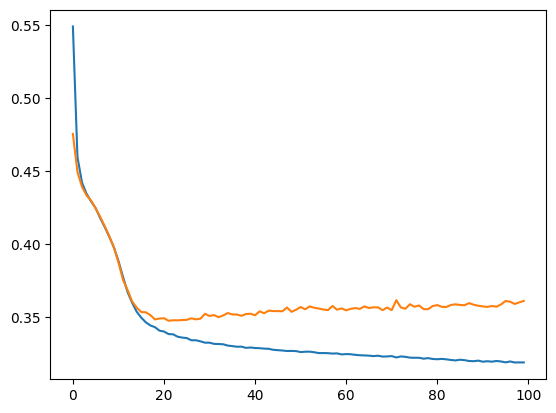

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

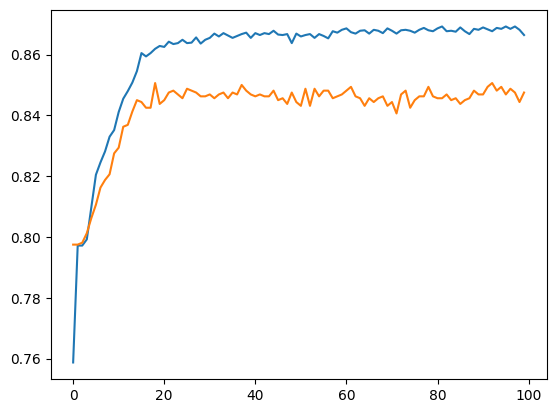

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])